## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze1.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [82]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [83]:
# Visão geral dos dados
print('Dimensões:', df.shape)
print('\nTipos:')
print(df.dtypes)
print('\nPrimeiras linhas:')
display(df.head())
print('\nEstatísticas descritivas (numéricas):')
display(df.describe())
print('\nFrequências das variáveis categóricas:')
for col in ['alcohol','antihist','smoker']:
    print(f'\n{col}:')
    print(df[col].value_counts())

Dimensões: (1200, 6)

Tipos:
nsneeze       int64
alcohol       int64
antihist      int64
smoker        int64
age         float64
pollen      float64
dtype: object

Primeiras linhas:


,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172



Estatísticas descritivas (numéricas):


,nsneeze,alcohol,antihist,smoker,age,pollen
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,17.093333,0.299167,0.251667,0.189167,40.342500,59.566507
std,27.537245,0.458084,0.434152,0.391804,13.324469,30.430699
min,0.000000,0.000000,0.000000,0.000000,18.000000,6.576282
25%,5.000000,0.000000,0.000000,0.000000,31.000000,38.017155
50%,10.000000,0.000000,0.000000,0.000000,40.000000,54.753465
75%,19.000000,1.000000,1.000000,0.000000,49.000000,74.416409
max,512.000000,1.000000,1.000000,1.000000,80.000000,202.922690



Frequências das variáveis categóricas:

alcohol:
alcohol
0    841
1    359
Name: count, dtype: int64

antihist:
antihist
0    898
1    302
Name: count, dtype: int64

smoker:
smoker
0    973
1    227
Name: count, dtype: int64


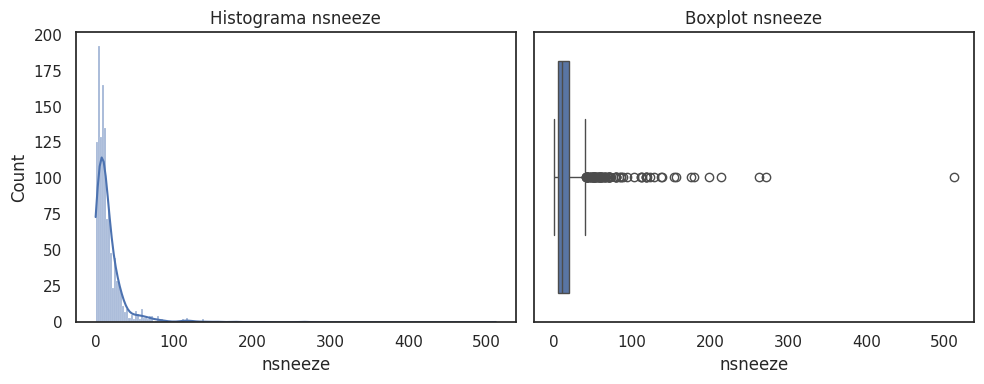

In [84]:
# Distribuição de nsneeze
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['nsneeze'], kde=True)
plt.title('Histograma nsneeze')
plt.subplot(1,2,2)
sns.boxplot(x=df['nsneeze'])
plt.title('Boxplot nsneeze')
plt.tight_layout()

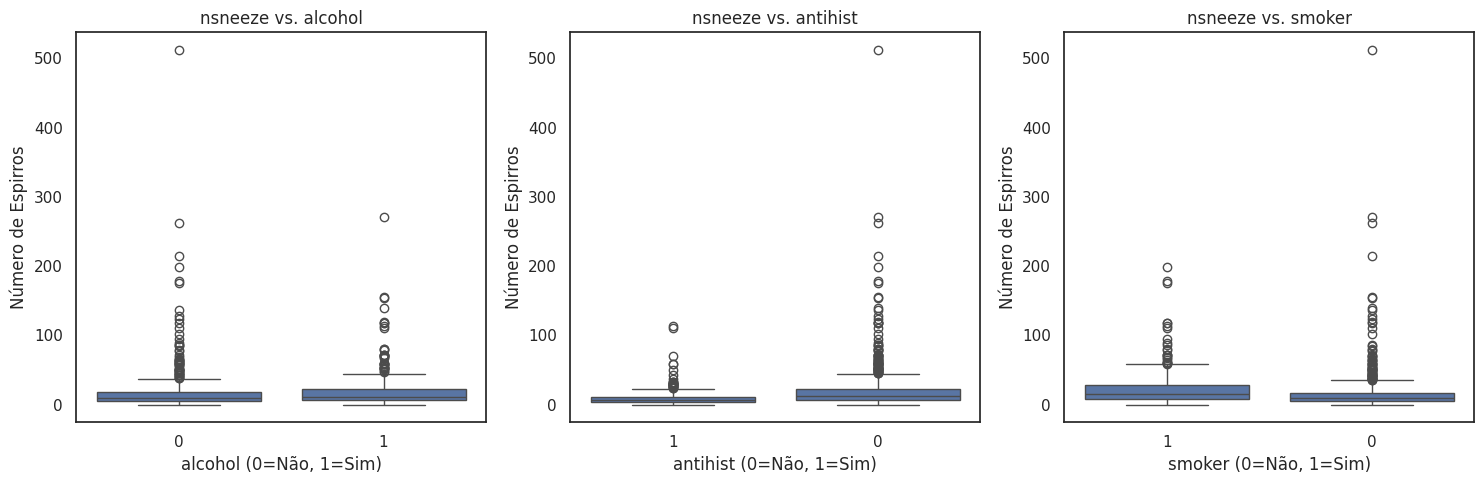

In [85]:
# Lista de variáveis binárias
binarias = ['alcohol', 'antihist', 'smoker']

# Boxplots de nsneeze vs. binárias
plt.figure(figsize=(15, 5))
for i, col in enumerate(binarias):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col].astype(str), y=df['nsneeze'])
    plt.title(f'nsneeze vs. {col}')
    plt.xlabel(f'{col} (0=Não, 1=Sim)')
    plt.ylabel('Número de Espirros')
plt.tight_layout()
plt.show()

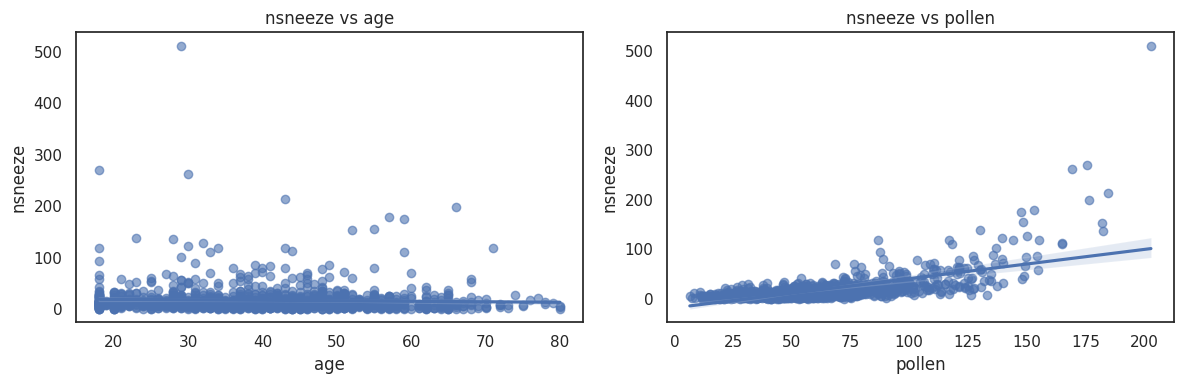

In [86]:
# Relação com idade e pólen
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.regplot(x='age', y='nsneeze', data=df, ax=axes[0], scatter_kws={'alpha':0.6})
axes[0].set_title('nsneeze vs age')
sns.regplot(x='pollen', y='nsneeze', data=df, ax=axes[1], scatter_kws={'alpha':0.6})
axes[1].set_title('nsneeze vs pollen')
plt.tight_layout()

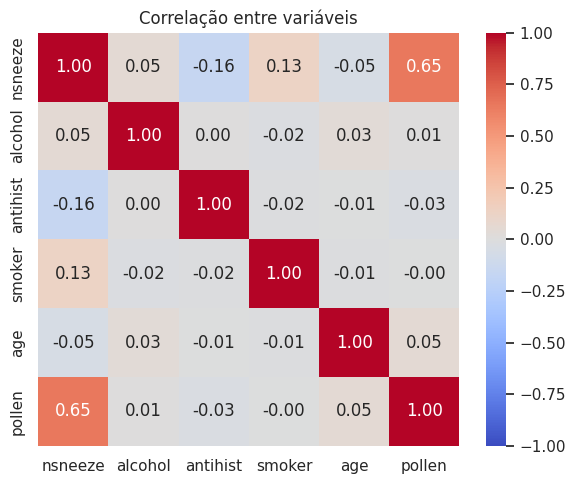

In [87]:
# Matriz de correlação
corr = df[['nsneeze','alcohol','antihist','smoker','age','pollen']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f",vmin=-1,vmax=1)
plt.title('Correlação entre variáveis')
plt.tight_layout()

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [88]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [89]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [90]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Mon, 01 Dec 2025   Deviance:                       4949.1
Time:                        18:03:45   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

In [91]:
# Interpretação dos coeficientes (Poisson): Razões de taxa (IRR)
params = ajuste_pois.params
conf = ajuste_pois.conf_int()
irr = np.exp(params)
irr_ci = np.exp(conf)
irr_df = pd.DataFrame({'coef': params, 'IRR': irr,
                       'IRR_low': irr_ci[0], 'IRR_high': irr_ci[1],
                       'p_value': ajuste_pois.pvalues})
display(irr_df)
print('\nInterpretação breve:')
for name,row in irr_df.iterrows():
    if name=='Intercept':
        continue
    print(f"{name}: IRR={row['IRR']:.3f} (IC95% {row['IRR_low']:.3f} - {row['IRR_high']:.3f}), p={row['p_value']:.4f}")

,coef,IRR,IRR_low,IRR_high,p_value
Intercept,1.555997,4.739809,4.503066,4.989000,0.000000e+00
C(alcohol)[T.1],0.219093,1.244947,1.209447,1.281489,7.696504e-50
C(antihist)[T.1],-0.644930,0.524699,0.504303,0.545921,4.890587e-223
C(smoker)[T.1],0.463901,1.590265,1.541925,1.640120,1.095799e-190
age,-0.011374,0.988690,0.987669,0.989712,2.457865e-103
pollen,0.022886,1.023150,1.022832,1.023469,0.000000e+00



Interpretação breve:
C(alcohol)[T.1]: IRR=1.245 (IC95% 1.209 - 1.281), p=0.0000
C(antihist)[T.1]: IRR=0.525 (IC95% 0.504 - 0.546), p=0.0000
C(smoker)[T.1]: IRR=1.590 (IC95% 1.542 - 1.640), p=0.0000
age: IRR=0.989 (IC95% 0.988 - 0.990), p=0.0000
pollen: IRR=1.023 (IC95% 1.023 - 1.023), p=0.0000


In [92]:
# Significância estatística resumida
sig = irr_df[['IRR','p_value']].copy()
sig['significante_5%'] = sig['p_value'] < 0.05
display(sig)
print('Variáveis com p<0.05:', ', '.join(sig[sig['significante_5%']].index.drop('Intercept', errors='ignore')))

,IRR,p_value,significante_5%
Intercept,4.739809,0.000000e+00,True
C(alcohol)[T.1],1.244947,7.696504e-50,True
C(antihist)[T.1],0.524699,4.890587e-223,True
C(smoker)[T.1],1.590265,1.095799e-190,True
age,0.988690,2.457865e-103,True
pollen,1.023150,0.000000e+00,True


Variáveis com p<0.05: C(alcohol)[T.1], C(antihist)[T.1], C(smoker)[T.1], age, pollen



**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [93]:
# Testes de superdispersão (Método 1: Pearson e Deviance)
pearson_chi2 = ((ajuste_pois.resid_pearson)**2).sum()
pearson_disp = pearson_chi2 / (df.shape[0] - len(ajuste_pois.params))
deviance = ajuste_pois.deviance
deviance_disp = deviance / (df.shape[0] - len(ajuste_pois.params))
print(f'Pearson chi2={pearson_chi2:.2f} -> Disp={pearson_disp:.2f}')
print(f'Deviance={deviance:.2f} -> Disp={deviance_disp:.2f}')
print('\nValores >>1 indicam superdispersão.')

Pearson chi2=5036.85 -> Disp=4.22
Deviance=4949.11 -> Disp=4.14

Valores >>1 indicam superdispersão.


In [94]:
# Teste auxiliar (Método 2): Regressão da variância empírica sobre a média
mu = ajuste_pois.fittedvalues
res = df['nsneeze']
# Variância empírica aproximada local usando (res - mu)^2
var_emp = (res - mu)**2
aux_df = pd.DataFrame({'var_emp': var_emp, 'mu': mu})
# Modelo linear var_emp ~ mu (Poisson espera var = mu)
import statsmodels.api as sm
X_aux = sm.add_constant(mu)
aux_fit = sm.OLS(var_emp, X_aux).fit()
print(aux_fit.summary().tables[1])
ratio_var_mean = var_emp.mean() / mu.mean()
print(f'Razão média var/mean ≈ {ratio_var_mean:.2f} (esperado ≈1 sob Poisson)')
print('Coeficiente de mu >1 e intercepto positivo reforçam superdispersão.')

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -273.2147     24.348    -11.221      0.000    -320.985    -225.445
0             24.4060      0.827     29.500      0.000      22.783      26.029
Razão média var/mean ≈ 8.42 (esperado ≈1 sob Poisson)
Coeficiente de mu >1 e intercepto positivo reforçam superdispersão.


In [95]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

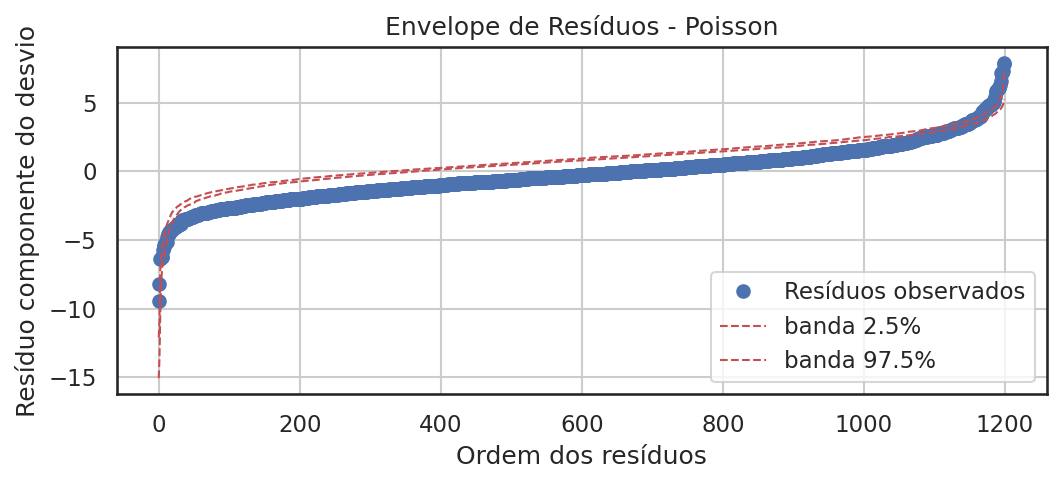

In [96]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [97]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3847.2
Date:                Mon, 01 Dec 2025   Deviance:                       1288.8
Time:                        18:03:47   Pearson chi2:                 1.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5615      0.059  

In [98]:
# Comparação de métricas Poisson vs NegBin
comp = pd.DataFrame({
    'Modelo': ['Poisson','NegBin'],
    'Deviance': [ajuste_pois.deviance, ajuste_nb.deviance],
    'AIC': [ajuste_pois.aic, ajuste_nb.aic]
})
comp['Dif_AIC_vs_Pois'] = comp['AIC'] - comp.loc[0,'AIC']
display(comp)
print('Menor AIC indica melhor ajuste; avaliar redução e overdisp.')

,Modelo,Deviance,AIC,Dif_AIC_vs_Pois
0,Poisson,4949.108384,9906.278039,0.00000
1,NegBin,1288.848137,7706.376159,-2199.90188


Menor AIC indica melhor ajuste; avaliar redução e overdisp.


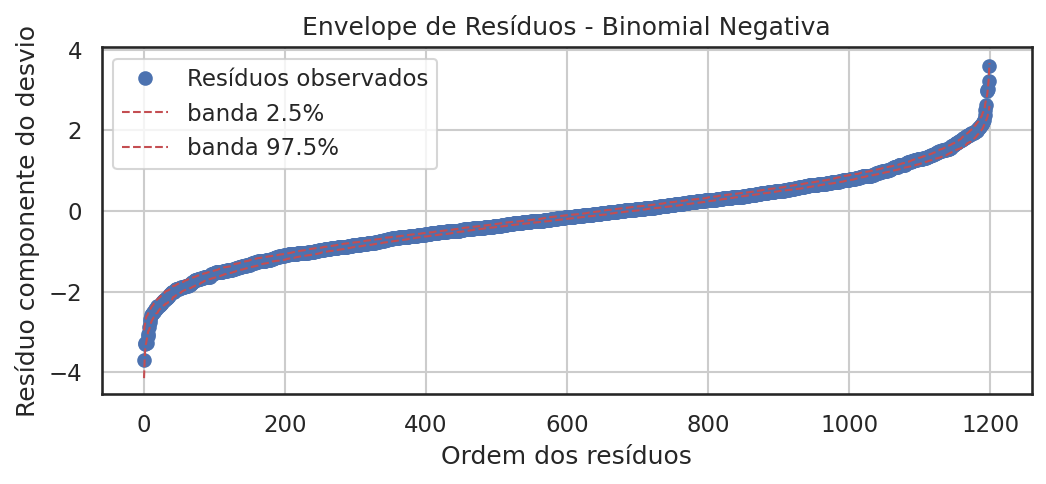

In [99]:
# Envelope resíduos Binomial Negativa já definido em results_nb
plt.figure(figsize=(8,3), dpi=150)
envelope_negbin(results_nb, 'Envelope de Resíduos - Binomial Negativa')

In [100]:
# Comentário automático sobre escolha de modelo
pois_over = ( (ajuste_pois.resid_pearson**2).sum() / (df.shape[0]-len(ajuste_pois.params)) )
print(f'Dispersão Pearson Poisson: {pois_over:.2f}')
if pois_over > 1.5:
    print('Superdispersão clara: preferir NegBin.')
print(f'AIC Poisson={ajuste_pois.aic:.1f} | AIC NegBin={ajuste_nb.aic:.1f}')
if ajuste_nb.aic < ajuste_pois.aic:
    print('NegBin apresenta menor AIC, reforçando escolha.')
else:
    print('Poisson mantém menor AIC; revisar necessidade de NegBin.')

Dispersão Pearson Poisson: 4.22
Superdispersão clara: preferir NegBin.
AIC Poisson=9906.3 | AIC NegBin=7706.4
NegBin apresenta menor AIC, reforçando escolha.




**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [101]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


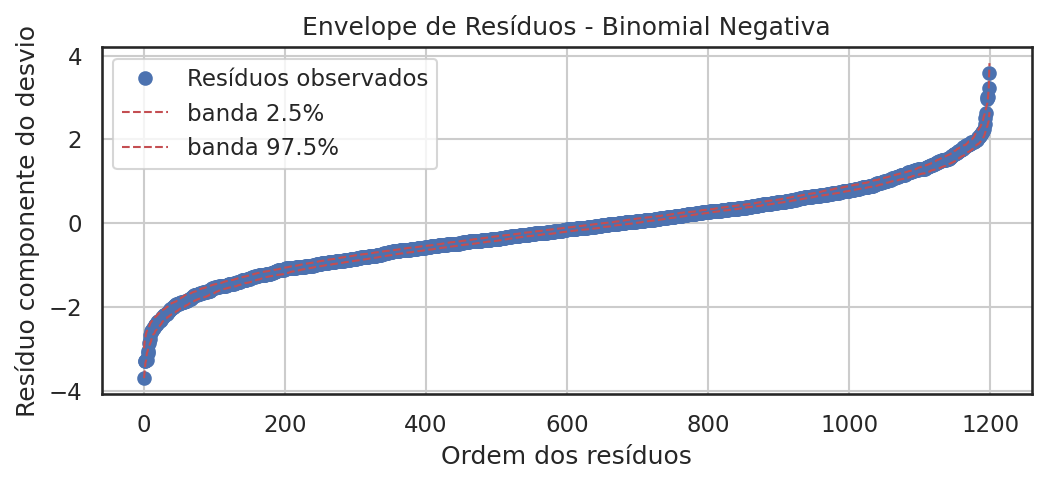

In [102]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [103]:
# Efeitos médios marginais para alcohol e antihist (modelo NegBin)
# Função manual para efeito marginal médio de variável binária

def marginal_effect_binary(model, data, var_name):
    data0 = data.copy(); data1 = data.copy()
    data0[var_name] = 0; data1[var_name] = 1
    mu0 = model.predict(data0)
    mu1 = model.predict(data1)
    return (mu1 - mu0).mean(), mu0.mean(), mu1.mean()

alc_eff, alc_mu0, alc_mu1 = marginal_effect_binary(ajuste_nb, df, 'alcohol')
ant_eff, ant_mu0, ant_mu1 = marginal_effect_binary(ajuste_nb, df, 'antihist')
print(f'Efeito marginal médio alcohol (1 vs 0): {alc_eff:.3f} espirros')
print(f'  Média prevista sem alcohol: {alc_mu0:.3f}; com alcohol: {alc_mu1:.3f}')
print(f'Efeito marginal médio antihist (1 vs 0): {ant_eff:.3f} espirros')
print(f'  Média prevista sem antihist: {ant_mu0:.3f}; com antihist: {ant_mu1:.3f}')

Efeito marginal médio alcohol (1 vs 0): 3.799 espirros
  Média prevista sem alcohol: 15.942; com alcohol: 19.741
Efeito marginal médio antihist (1 vs 0): -9.367 espirros
  Média prevista sem antihist: 19.257; com antihist: 9.890


In [104]:
# Interpretação em termos relativos (IRR do NB)
params_nb = ajuste_nb.params
ci_nb = ajuste_nb.conf_int()
irr_nb = np.exp(params_nb)
irr_nb_ci = np.exp(ci_nb)
nb_df = pd.DataFrame({'coef': params_nb, 'IRR': irr_nb, 'IRR_low': irr_nb_ci[0], 'IRR_high': irr_nb_ci[1], 'p_value': ajuste_nb.pvalues})
display(nb_df)
print('\nPrincipais efeitos:')
for name,row in nb_df.iterrows():
    if name=='Intercept':
        continue
    print(f"{name}: IRR={row['IRR']:.3f} (IC95% {row['IRR_low']:.3f}-{row['IRR_high']:.3f}) p={row['p_value']:.2e}")

,coef,IRR,IRR_low,IRR_high,p_value
Intercept,1.561516,4.766042,4.243019,5.353537,8.928766e-153
C(alcohol)[T.1],0.213744,1.238306,1.158648,1.323441,2.964361e-10
C(antihist)[T.1],-0.666355,0.513577,0.476254,0.553826,3.952341e-67
C(smoker)[T.1],0.492578,1.636529,1.517452,1.764951,2.132544e-37
age,-0.010860,0.989199,0.986885,0.991518,9.887715e-20
pollen,0.022542,1.022798,1.021808,1.023789,0.000000e+00



Principais efeitos:
C(alcohol)[T.1]: IRR=1.238 (IC95% 1.159-1.323) p=2.96e-10
C(antihist)[T.1]: IRR=0.514 (IC95% 0.476-0.554) p=3.95e-67
C(smoker)[T.1]: IRR=1.637 (IC95% 1.517-1.765) p=2.13e-37
age: IRR=0.989 (IC95% 0.987-0.992) p=9.89e-20
pollen: IRR=1.023 (IC95% 1.022-1.024) p=0.00e+00


In [105]:
# Execução dos cálculos de efeitos marginais
alc_eff, ant_eff

(3.7990552236800266, -9.366961638193283)

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [106]:
# Split 70/30
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.30, random_state=42)
print('Treino:', train_df.shape, 'Teste:', test_df.shape)

Treino: (840, 6) Teste: (360, 6)


In [107]:
# Ajuste modelos em treino
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"
pois_tr = smf.glm(formula=formula, data=train_df, family=sm.families.Poisson()).fit()
nb_tr = smf.glm(formula=formula, data=train_df, family=sm.families.NegativeBinomial(alpha=alpha_fixado)).fit()
print('AIC treino Poisson', pois_tr.aic)
print('AIC treino NegBin', nb_tr.aic)

AIC treino Poisson 6775.264606000615
AIC treino NegBin 5359.194440097786


In [108]:
# Predições no teste e métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error
mu_pois_test = pois_tr.predict(test_df)
mu_nb_test = nb_tr.predict(test_df)
y_test = test_df['nsneeze']

mse_pois = mean_squared_error(y_test, mu_pois_test)
mae_pois = mean_absolute_error(y_test, mu_pois_test)
mse_nb = mean_squared_error(y_test, mu_nb_test)
mae_nb = mean_absolute_error(y_test, mu_nb_test)

metricas = pd.DataFrame({
    'Modelo':['Poisson','NegBin'],
    'MSE':[mse_pois, mse_nb],
    'MAE':[mae_pois, mae_nb]
})
display(metricas)
print('Menores MSE/MAE indicam melhor performance preditiva.')

,Modelo,MSE,MAE
0,Poisson,230.439687,7.255887
1,NegBin,240.306402,7.271385


Menores MSE/MAE indicam melhor performance preditiva.


In [109]:
# Comentário sobre desempenho
print(f'MSE Poisson={mse_pois:.2f} vs NegBin={mse_nb:.2f}')
print(f'MAE Poisson={mae_pois:.2f} vs NegBin={mae_nb:.2f}')
if (mse_nb < mse_pois) and (mae_nb < mae_pois):
    print('NegBin superior em ambas as métricas de teste.')
else:
    print('Revisar: Poisson mostra métrica menor em pelo menos uma medida.')

MSE Poisson=230.44 vs NegBin=240.31
MAE Poisson=7.26 vs NegBin=7.27
Revisar: Poisson mostra métrica menor em pelo menos uma medida.


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [110]:
# Previsões perfis A e B usando modelo selecionado (NegBin para ajuste, Poisson melhor teste?)
# Critério: superdispersão forte sugere usar NegBin para inferência.
# Definir dias de baixa e alta concentração: usar quantis do conjunto.
low_pollen = df['pollen'].quantile(0.10)
high_pollen = df['pollen'].quantile(0.90)
perfil_A = pd.DataFrame({'alcohol':[0],'antihist':[1],'smoker':[0],'age':[30],'pollen':[low_pollen]})
perfil_B = pd.DataFrame({'alcohol':[1],'antihist':[0],'smoker':[1],'age':[50],'pollen':[high_pollen]})
prev_A_nb = ajuste_nb.predict(perfil_A)[0]
prev_B_nb = ajuste_nb.predict(perfil_B)[0]
prev_A_pois = ajuste_pois.predict(perfil_A)[0]
prev_B_pois = ajuste_pois.predict(perfil_B)[0]
print(f'Perfil A (NB): {prev_A_nb:.2f} espirros esperados')
print(f'Perfil B (NB): {prev_B_nb:.2f} espirros esperados')
print(f'Perfil A (Poisson): {prev_A_pois:.2f} | Perfil B (Poisson): {prev_B_pois:.2f}')
print(f'Concentração pólen baixa ~ {low_pollen:.2f}, alta ~ {high_pollen:.2f}')

Perfil A (NB): 3.10 espirros esperados
Perfil B (NB): 52.80 espirros esperados
Perfil A (Poisson): 3.13 | Perfil B (Poisson): 51.74
Concentração pólen baixa ~ 24.94, alta ~ 99.44
